# HW4. 객체 탐지 모델 이론 및 구현

## Object Detection 실습 구현 - YOLO 시리즈 / Faster-RCNN 기반

- 프레임워크: PyTorch
- 실행 환경: 개인 PC(GPU)
- 실습 모델: YOLOv5
- 실험 대상: COCO128

## 1. 데이터셋 준비

In [2]:
!conda activate yolo
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -r requirements.txt


CondaError: Run 'conda init' before 'conda activate'

fatal: destination path 'yolov5' already exists and is not an empty directory.
/home/hsy/CBNU/CBNU_25/CBNU_ComputerVision_25/HW/HW4/yolov5
Note: you may need to restart the kernel to use updated packages.


In [3]:
!curl -L "https://github.com/ultralytics/yolov5/releases/download/v1.0/coco128.zip" -o coco128.zip
!unzip coco128.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100 6819k  100 6819k    0     0  3933k      0  0:00:01  0:00:01 --:--:-- 31.1M
Archive:  coco128.zip
   creating: coco128/
  inflating: coco128/LICENSE         
   creating: coco128/images/
   creating: coco128/images/train2017/
  inflating: coco128/images/train2017/000000000612.jpg  
  inflating: coco128/images/train2017/000000000404.jpg  
  inflating: coco128/images/train2017/000000000438.jpg  
  inflating: coco128/images/train2017/000000000389.jpg  
  inflating: coco128/images/train2017/000000000564.jpg  
  inflating: coco128/images/train2017/000000000149.jpg  
  inflating: coco128/images/train2017/000000000605.jpg  
  inflating: coco128/images/train2017/000000000349.jpg  
  inflating: coco128/images/train2017/000000000201.jpg  
  inflating: coco128/

## 2. 모델 학습

In [4]:
!python train.py --img 640 --batch 16 --epochs 50 --data coco128.yaml --weights yolov5m.pt --project ./runs/train --name my_yolo_exp

train: weights=yolov5m.pt, cfg=, data=coco128.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=./runs/train, name=my_yolo_exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: ⚠️ YOLOv5 is out of date by 1 commit. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmu

## 3. 성능 평가, 분석

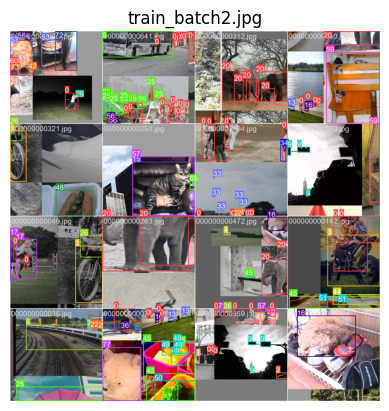

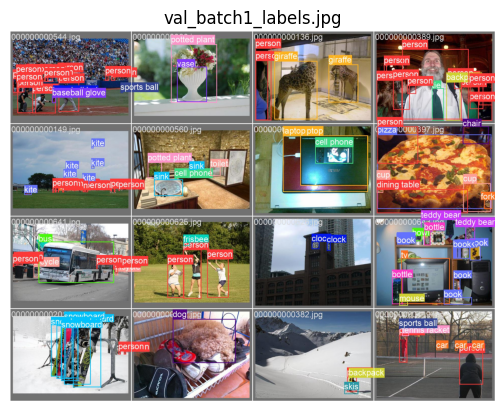

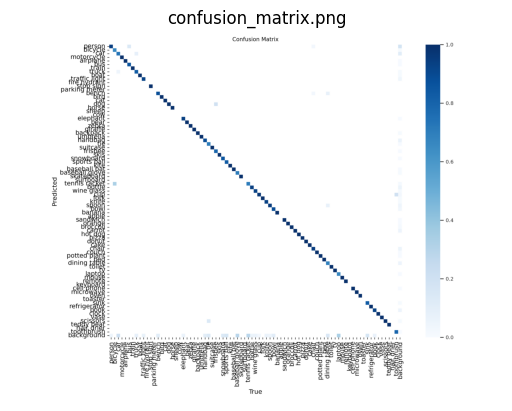

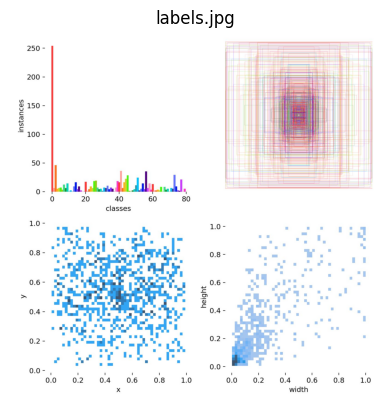

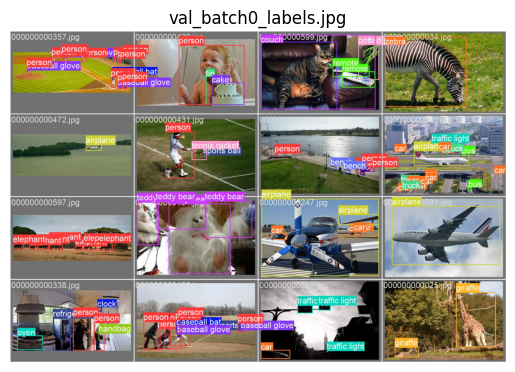

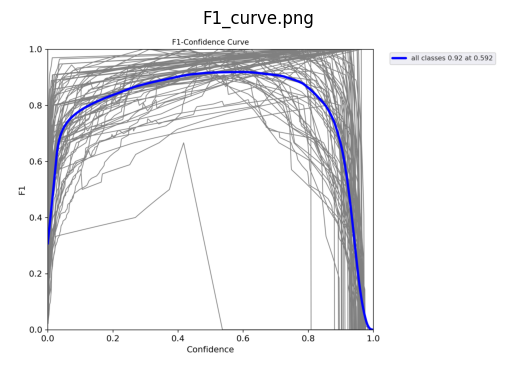

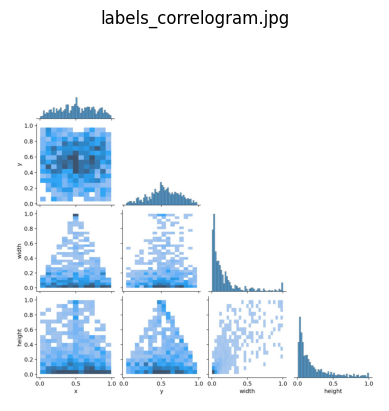

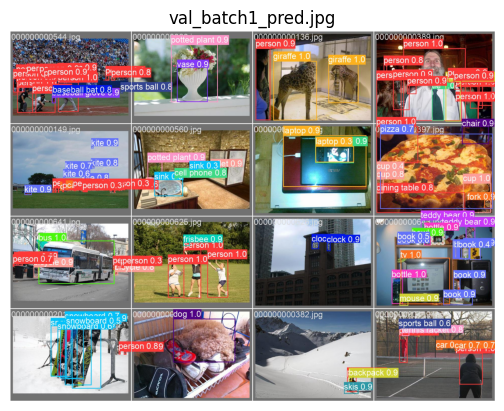

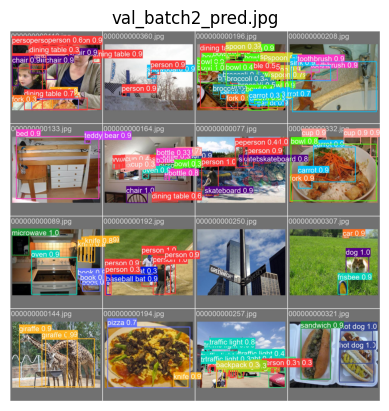

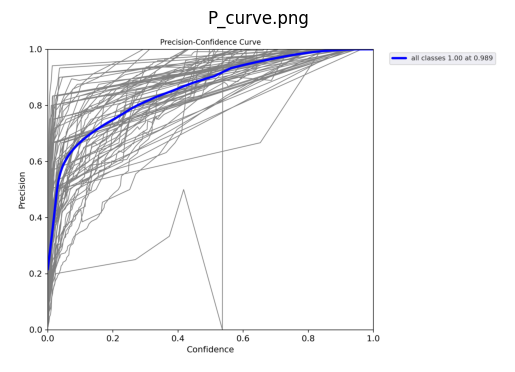

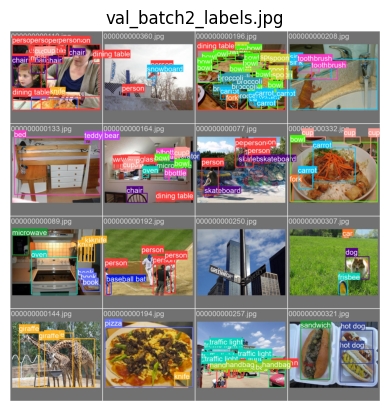

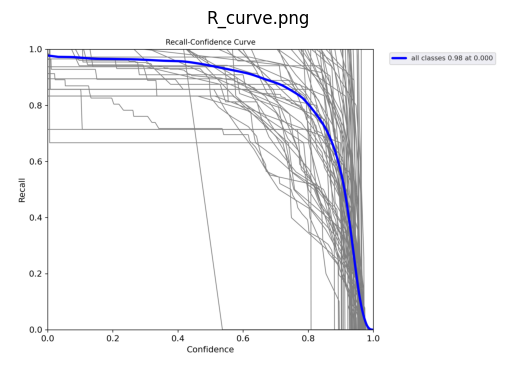

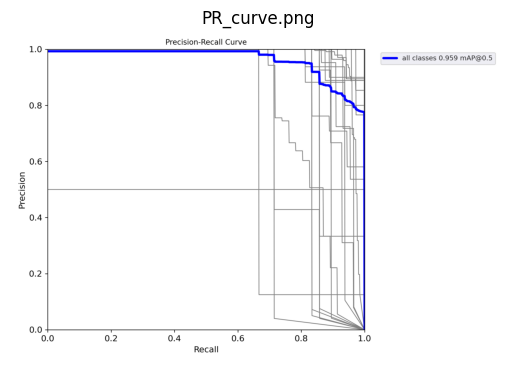

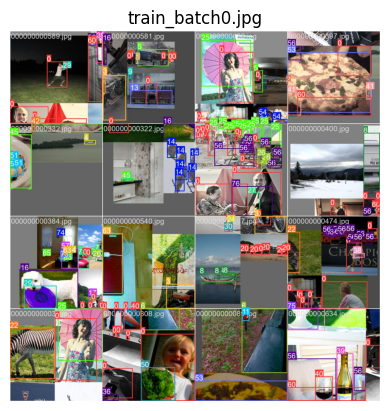

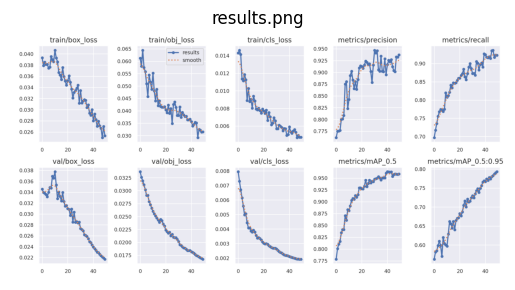

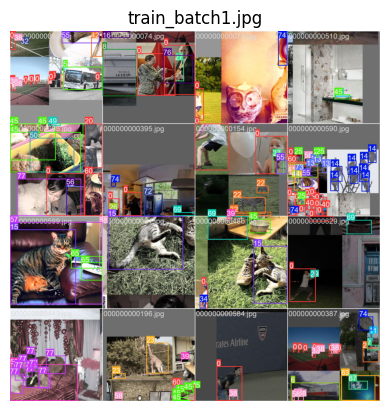

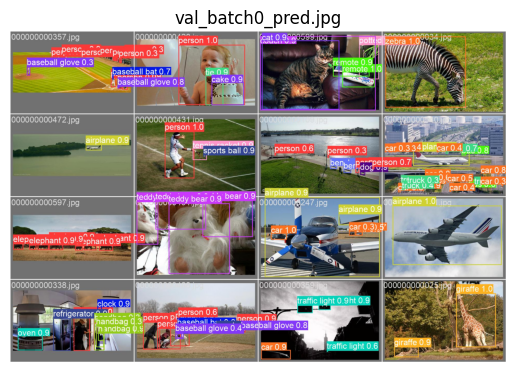

In [7]:
import os
from PIL import Image

import matplotlib.pyplot as plt

image_dir = 'runs/train/my_yolo_exp3'

image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    img = Image.open(image_path)
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)
    plt.show()

## 4. Inference

In [8]:
!python detect.py --weights runs/train/my_yolo_exp/weights/best.pt --img 640 --source data/images

detect: weights=['runs/train/my_yolo_exp/weights/best.pt'], source=data/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_format=0, save_csv=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-420-g0c99ce80 Python-3.10.18 torch-2.7.1+cu126 CUDA:0 (NVIDIA GeForce RTX 4070 Ti, 12282MiB)

Fusing layers... 
Model summary: 157 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
image 1/10 /home/hsy/CBNU/CBNU_25/CBNU_ComputerVision_25/HW/HW4/yolov5/data/images/1_qNkH4lxA670j1d9OWh1lww.jpg: 448x640 7 persons, 2 bicycles, 4 cars, 2 traffic lights, 2 stop signs, 21.2ms
image 2/10 /home/hsy/CBNU/CBNU_25/CBNU_ComputerVision_25/HW/HW4/yolov5/data/images/20230719170831_0.jpeg:

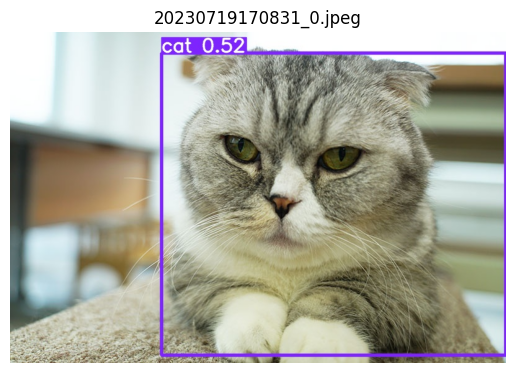

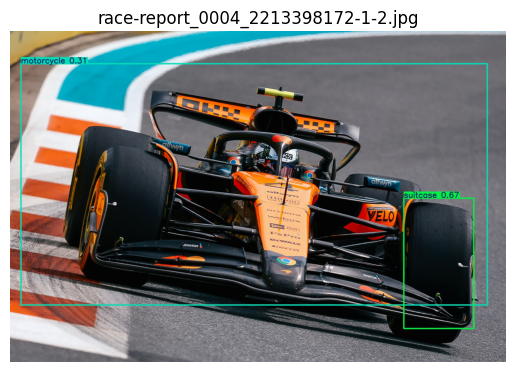

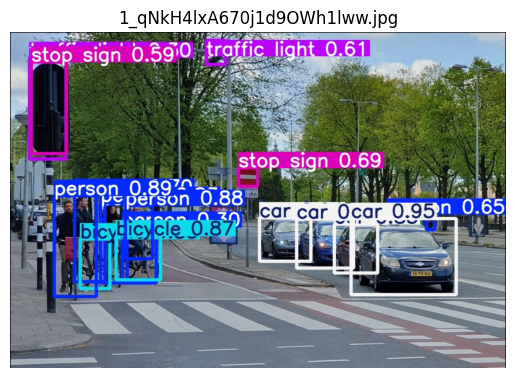

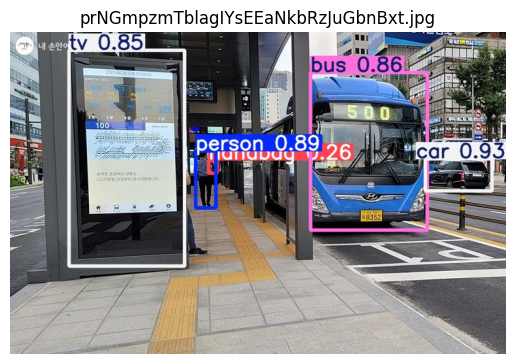

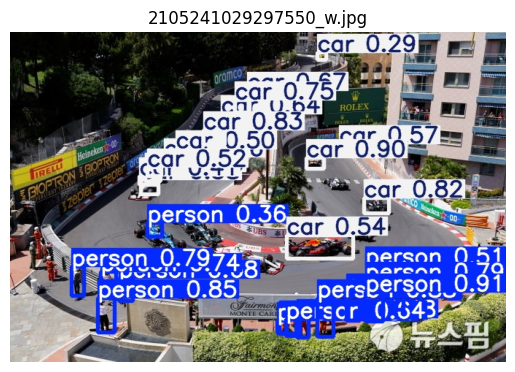

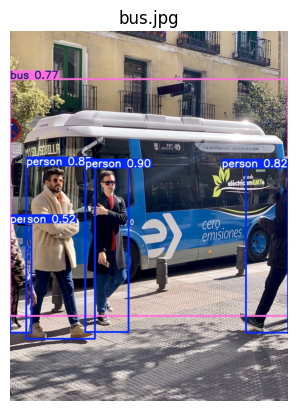

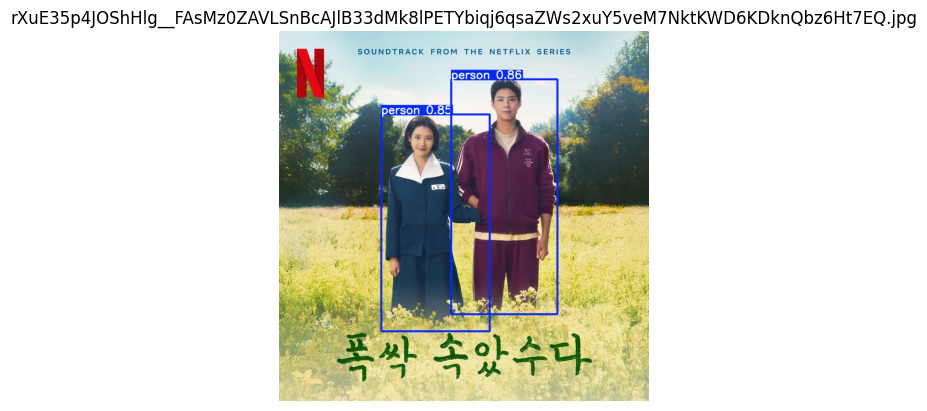

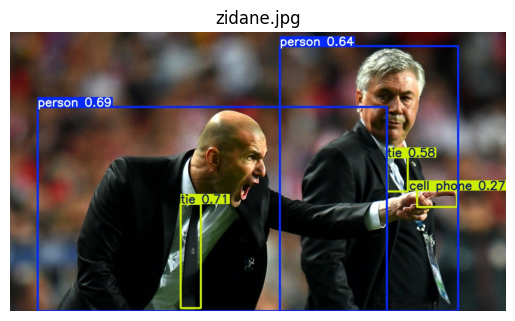

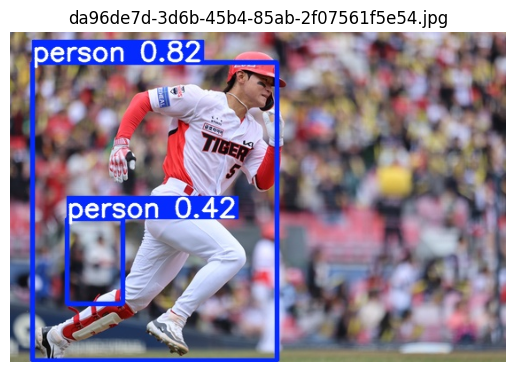

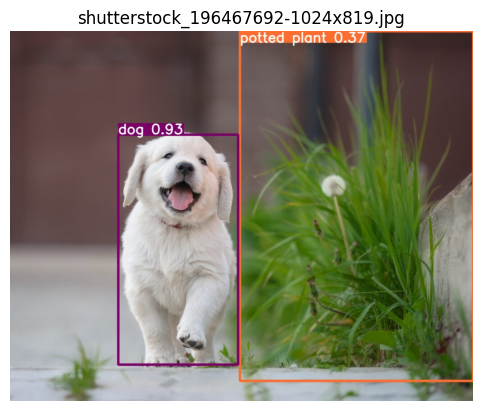

In [10]:
import os
from PIL import Image

import matplotlib.pyplot as plt

image_dir = 'runs/detect/exp2'

image_files = [f for f in os.listdir(image_dir) if f.endswith(('.png', '.jpg', '.jpeg'))]

for image_file in image_files:
    image_path = os.path.join(image_dir, image_file)
    img = Image.open(image_path)
    plt.figure()
    plt.imshow(img)
    plt.axis('off')
    plt.title(image_file)
    plt.show()